<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Delhivery%20-%20Feature%20Engineering%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

* The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors

# **Business Problem**

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

# **Desired Outcome of Analysis**

* Basic data cleaning and exploration:
** Handle missing values in the data.
** Analyze the structure of the data.
** Try merging the rows using the hint mentioned above.
* Build some features to prepare the data for actual analysis. Extract features from the below fields:
** Destination Name: Split and extract features out of destination. City-place-code (State)
** Source Name: Split and extract features out of destination. City-place-code (State)
** Trip_creation_time: Extract features like month, year and day etc
* In-depth analysis and feature engineering
** Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required
** Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.
** Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
** Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
** Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
** Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
** Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis
** Handle the outliers using the IQR method.
** Do one-hot encoding of categorical variables (like route_type)
Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler






# **Loading Modules and Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from scipy.stats import ttest_1samp, ttest_ind,ttest_rel

from scipy.stats import chisquare,chi2,chi2_contingency

from scipy.stats import f_oneway,kruskal,shapiro,levene
from statsmodels.graphics.gofplots import qqplot

from scipy.stats import pearsonr,spearmanr

from scipy.stats import poisson,expon
!pip install category_encoders
from category_encoders import TargetEncoder
!pip install sklearn
from sklearn.preprocessing import LabelEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv")

**Description of each column in data**
* data - tells whether the data is testing or training data
* trip_creation_time – Timestamp of trip creation
* route_schedule_uuid – Unique Id for a particular route schedule
* route_type – Transportation type
* FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
Carting: Handling system consisting of small vehicles (carts)
* trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
* source_center - Source ID of trip origin
* source_name - Source Name of trip origin
* destination_cente – Destination ID
* destination_name – Destination Name
* od_start_time – Trip start time
* od_end_time – Trip end time
* start_scan_to_end_scan – Time taken to deliver from source to destination
* is_cutoff – Unknown field
* cutoff_factor – Unknown field
* cutoff_timestamp – Unknown field
* actual_distance_to_destination – Distance in Kms between source and destination warehouse
* actual_time – Actual time taken to complete the delivery (Cumulative)
* osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
* osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
* factor – Unknown field
* segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
* segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
* segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
* segment_factor – Unknown field

# **Data Cleaning**

In [ ]:
data.shape

(144867, 24)

In [ ]:
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=144867, step=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

## Dropping Unknown columns

Lets Drop the unknown Fields
* is_cutoff – Unknown field,
* cutoff_factor – Unknown field,
* cutoff_timestamp – Unknown field
* factor – Unknown field
* segment_factor – Unknown field


In [3]:
data.drop(columns = ["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"], axis = 1,inplace= True)

In [ ]:
data.shape

(144867, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

## Datatype Conversion of Features

Lets convert possible Column to "Cateory" datatype
* route_type – Transportation type
* data - tells whether the data is testing or training data

In [4]:
data["route_type"]=data["route_type"].astype("category")
data["data"]=data["data"].astype("category")

Lets Convert Datetime Columns as datatime64[ns]
* trip_creation_time – Timestamp of trip creation
* od_start_time – Trip start time
* od_end_time – Trip end time

In [5]:
data["trip_creation_time"]=data["trip_creation_time"].astype("datetime64")
data["od_start_time"]=data["od_start_time"].astype("datetime64")
data["od_end_time"]=data["od_end_time"].astype("datetime64")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

## Duplicate Values & Their Treatment

In [ ]:
data.loc[data.duplicated()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance


No duplicate rows found

## Missingvalues & Their Treatment

In [ ]:
data.isna().sum(axis = 0)

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

* Missing Values are present only in source_name & Destination_name
* As there are not missing values in source_centre & destination_centre, we can check if Source_name & Destination_name existing in any of the rows

In [6]:
sourcenamemissingsourcesentre = data.loc[data["source_name"].isnull() == True]["source_center"].unique()
sourcenamemissingsourcesentre

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [7]:
j = 1
for i in sourcenamemissingsourcesentre:
  missedsourcename = data.loc[data["source_center"] == i]["source_name"].unique()
  if pd.isna(missedsourcename):
    data.loc[data["source_center"] == i,"source_name"] = "unknownsource "+str(j)
    j+=1
  else:
    data.loc[data["source_center"] == i,"source_name"]["source_name"] = missedsourcename[:1]

In [8]:
for i in sourcenamemissingsourcesentre:
  print(i, data.loc[data["source_center"] == i]["source_name"].unique())

IND342902A1B ['unknownsource 1']
IND577116AAA ['unknownsource 2']
IND282002AAD ['unknownsource 3']
IND465333A1B ['unknownsource 4']
IND841301AAC ['unknownsource 5']
IND509103AAC ['unknownsource 6']
IND126116AAA ['unknownsource 7']
IND331022A1B ['unknownsource 8']
IND505326AAB ['unknownsource 9']
IND852118A1B ['unknownsource 10']


In [9]:
destinationnamemissingdestinationsentre = data.loc[data["destination_name"].isnull() == True]["destination_center"].unique()
destinationnamemissingdestinationsentre

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [10]:
j = 1
for i in destinationnamemissingdestinationsentre:
  misseddestinationname = data.loc[data["destination_center"] == i]["destination_name"].unique()
  if pd.isna(misseddestinationname):
    data.loc[data["destination_center"] == i,"destination_name"] = "unknowndestination "+str(j)
    j+=1
  else:
    data.loc[data["destination_center"] == i,"destination_name"]["destination_name"] = misseddestinationname[:1]

In [11]:
for i in destinationnamemissingdestinationsentre:
  print(i, data.loc[data["destination_center"] == i]["destination_name"].unique())

IND342902A1B ['unknowndestination 1']
IND577116AAA ['unknowndestination 2']
IND282002AAD ['unknowndestination 3']
IND465333A1B ['unknowndestination 4']
IND841301AAC ['unknowndestination 5']
IND505326AAB ['unknowndestination 6']
IND852118A1B ['unknowndestination 7']
IND126116AAA ['unknowndestination 8']
IND509103AAC ['unknowndestination 9']
IND221005A1A ['unknowndestination 10']
IND250002AAC ['unknowndestination 11']
IND331001A1C ['unknowndestination 12']
IND122015AAC ['unknowndestination 13']


In [12]:
data.isna().sum(axis=0)

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

* All Missing items of source_name & destination_name have been Filled

## Merging Rows

* Let us verify one trip_uuid & one route_schedule_uuid Details & see how multiple rows can be merged

In [ ]:
data.loc[data["trip_uuid"] == data["trip_uuid"].unique()[0]]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


In [ ]:
data.loc[data["route_schedule_uuid"] == data["route_schedule_uuid"].unique()[0]]["trip_uuid"].value_counts()

trip-153680339869927048    11
trip-153697725798753764    11
trip-153818828153597720    11
trip-153741093647649320    10
trip-153757917674683146    10
trip-153792558519954345    10
trip-153810169136762438    10
trip-153836091722390431    10
trip-153671811509671845    10
trip-153801468900715290    10
trip-153689022134280351     6
trip-153723562875380861     5
trip-153853302491268026     5
trip-153845108130043002     5
Name: trip_uuid, dtype: int64

In [ ]:
data.loc[data["route_schedule_uuid"] == data["route_schedule_uuid"].unique()[0]]["source_name"].value_counts()

Khambhat_MotvdDPP_D (Gujarat)    69
Anand_VUNagar_DC (Gujarat)       54
Anand_Vaghasi_IP (Gujarat)        1
Name: source_name, dtype: int64

In [ ]:
data.loc[data["route_schedule_uuid"] == data["route_schedule_uuid"].unique()[0]]["destination_name"].value_counts()

Anand_Vaghasi_IP (Gujarat)       69
Khambhat_MotvdDPP_D (Gujarat)    54
Anand_VUNagar_DC (Gujarat)        1
Name: destination_name, dtype: int64

* From above 4 cell we can say that "route_schedule_uuid" futher consists of many "trip_uuid"
* Further each "trip_uuid has many destination & sources -- Because of this we cannot directly "groupby" on "trip_uuid"
* First we will use "groupby" on 3 columns - ['trip_uuid','source_center','destination_center'] and use aggregations as needed for each feature & again then we will "groupby"" on 1 column "trip_uuid"

### Merging1

In [13]:
data1 = data.groupby(['trip_uuid','source_center','destination_center']).agg({'data' : 'first',
'route_schedule_uuid' : 'first' ,
'route_type' : 'first',
'trip_creation_time' : 'first',
'source_name' : 'first',
'destination_name' : 'last',
'od_start_time' : 'first',
'od_end_time' : 'first',
'start_scan_to_end_scan' : 'first',
'actual_distance_to_destination' : 'last',
'actual_time' : 'last',
'osrm_time' : 'last',
'osrm_distance' : 'last',
'segment_actual_time' : 'sum',
'segment_osrm_time' : 'sum',
'segment_osrm_distance' : 'sum'}).reset_index()

In [ ]:
data.shape

(144867, 19)

In [ ]:
data1.shape

(26368, 19)

In [ ]:
data1.head(5)

,trip_uuid,source_center,destination_center,data,route_schedule_uuid,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408


### Merging2

* Now lets do second groupby with only "trip_uuid"
* Here we have to sort any of "od-start_time" or "od_end_time" for each  "trip_uuid" to ensure we get correct initial source & final destination for each trip_uuid


In [14]:
data1.sort_values(by=['trip_uuid', 'od_start_time'], ascending=[True,True],inplace = True,ignore_index=True)

In [15]:
data2 = data1.groupby(['trip_uuid']).agg({'data' : 'first',
'route_schedule_uuid' : 'first' ,
'route_type' : 'first',
'trip_creation_time' : 'first',
'source_name' : 'first','source_center' : 'first',
'destination_name' : 'last','destination_center' : 'last',
'od_start_time' : 'first',
'od_end_time' : 'last',
'start_scan_to_end_scan' : 'sum',
'actual_distance_to_destination' : 'sum',
'actual_time' : 'sum',
'osrm_time' : 'sum',
'osrm_distance' : 'sum',
'segment_actual_time' : 'sum',
'segment_osrm_time' : 'sum',
'segment_osrm_distance' : 'sum'}).reset_index()

In [16]:
data1.shape

(26368, 19)

In [17]:
data2.shape

(14817, 19)

In [ ]:
data2.head(5)

,trip_uuid,data,route_schedule_uuid,route_type,trip_creation_time,source_name,source_center,destination_name,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),IND572101AAA,Chikblapur_ShntiSgr_D (Karnataka),IND562101AAA,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),IND562132AAA,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),IND400072AAB,Mumbai_MiraRd_IP (Maharashtra),IND401104AAA,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


### Recheck on Merged Data

In [18]:
data.loc[data["trip_uuid"] == "trip-153671041653548748"]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
124981,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,22.812439,43.0,39.0,55.2597,43.0,39.0,55.2597
124982,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,45.902553,69.0,35.0,49.4845,25.0,52.0,73.8647
124983,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,68.090371,146.0,51.0,72.5479,76.0,16.0,23.0634
124984,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,88.382207,181.0,66.0,93.9641,35.0,15.0,21.4162
124985,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,110.168313,205.0,82.0,117.2332,23.0,16.0,23.2691
124986,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,133.062129,234.0,99.0,141.1550,28.0,16.0,23.9218
124987,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,154.393443,256.0,116.0,164.9134,22.0,16.0,23.7584
124988,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,177.997213,286.0,134.0,190.8280,29.0,18.0,25.9146
124989,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,199.007702,318.0,153.0,216.2362,32.0,18.0,25.4082
124990,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,221.688428,360.0,174.0,243.0267,41.0,36.0,46.2758


In [19]:
data1.loc[data1["trip_uuid"] == "trip-153671041653548748"]

,trip_uuid,source_center,destination_center,data,route_schedule_uuid,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND462022AAA,IND209304AAA,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
1,trip-153671041653548748,IND209304AAA,IND000000ACB,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205


In [20]:
data2.loc[data2["trip_uuid"] == "trip-153671041653548748"]

,trip_uuid,data,route_schedule_uuid,route_type,trip_creation_time,source_name,source_center,destination_name,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733


* As can be seen from above 3 cells now we can single row for each "trip_uuid" with proper od_start_time,od_end_time, Source & Destination deatails with summed up Distance and time values

## Feature Engineering

### Reducing Features

* "od_start_time" & "od_end_time"can be converted to single feature by calcualting time difeence between both

In [21]:
data2['od_total_time'] = (data2['od_end_time'] - data2['od_start_time']) / np.timedelta64(1, 'm')
data2.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
data2.head()

,trip_uuid,data,route_schedule_uuid,route_type,trip_creation_time,source_name,source_center,destination_name,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2260.109800
1,trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),IND572101AAA,Chikblapur_ShntiSgr_D (Karnataka),IND562101AAA,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,181.611874
2,trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),IND562132AAA,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3934.362520
3,trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),IND400072AAB,Mumbai_MiraRd_IP (Maharashtra),IND401104AAA,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,100.494935
4,trip-153671052974046625,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,718.349042


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  category      
 2   route_schedule_uuid             14817 non-null  object        
 3   route_type                      14817 non-null  category      
 4   trip_creation_time              14817 non-null  datetime64[ns]
 5   source_name                     14817 non-null  object        
 6   source_center                   14817 non-null  object        
 7   destination_name                14817 non-null  object        
 8   destination_center              14817 non-null  object        
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float64       
 11  ac

### Create New Features

#### Extract features like month, year, day & week from Trip_creation_time

In [22]:
data2['trip_creation_hour'] = data2['trip_creation_time'].dt.hour
data2['trip_creation_day'] = data2['trip_creation_time'].dt.day
data2['trip_creation_week'] = data2['trip_creation_time'].dt.isocalendar().week
data2['trip_creation_month'] = data2['trip_creation_time'].dt.month
data2['trip_creation_year'] = data2['trip_creation_time'].dt.year

All 5 above new Features are Cateogorical type, So lets convert them into Category Datatype

In [23]:
data2['trip_creation_hour'] = data2['trip_creation_hour'].astype("category")
data2['trip_creation_day'] = data2['trip_creation_day'].astype("category")
data2['trip_creation_week'] = data2['trip_creation_week'].astype("category")
data2['trip_creation_month'] = data2['trip_creation_month'].astype("category")
data2['trip_creation_year'] = data2['trip_creation_year'].astype("category")

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  category      
 2   route_schedule_uuid             14817 non-null  object        
 3   route_type                      14817 non-null  category      
 4   trip_creation_time              14817 non-null  datetime64[ns]
 5   source_name                     14817 non-null  object        
 6   source_center                   14817 non-null  object        
 7   destination_name                14817 non-null  object        
 8   destination_center              14817 non-null  object        
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float64       
 11  ac

In [24]:
data2.nunique()

trip_uuid                         14817
data                                  2
route_schedule_uuid                1504
route_type                            2
trip_creation_time                14817
source_name                         868
source_center                       868
destination_name                    956
destination_center                  956
start_scan_to_end_scan             2208
actual_distance_to_destination    14801
actual_time                        1853
osrm_time                           817
osrm_distance                     14734
segment_actual_time                1890
segment_osrm_time                  1242
segment_osrm_distance             14754
od_total_time                     14817
trip_creation_hour                   24
trip_creation_day                    22
trip_creation_week                    4
trip_creation_month                   2
trip_creation_year                    1
dtype: int64

* In this Dataset "trip_creation_year" is having only 1 unique values, this feature can be dropped
* However we will keep the feature for now [ so that this code can be generalized for any similar dataset in future]

#### Extract Feature like City,State from "source_name" & "destination_name"

In [ ]:
data2["source_name"].unique()[:10]

array(['Bhopal_Trnsport_H (Madhya Pradesh)',
       'Tumkur_Veersagr_I (Karnataka)',
       'Bangalore_Nelmngla_H (Karnataka)', 'Mumbai Hub (Maharashtra)',
       'Bellary_Dc (Karnataka)', 'Chennai_Porur_DPC (Tamil Nadu)',
       'Chennai_Chrompet_DPC (Tamil Nadu)', 'HBR Layout PC (Karnataka)',
       'Surat_Central_I_4 (Gujarat)', 'Delhi_Lajpat_IP (Delhi)'],
      dtype=object)

* we will have to use multiple split function to separate State, City & Place_code
* We will create functions to commonly apply for destination_name & source_name

In [25]:
def state(x):
  y = x.split("(")
  if len(y) == 2:
    return y[1].replace(")","")
  elif len(y)== 1:
    return x

In [ ]:
state('Mumbai Hub (Maharashtra)')

'Maharashtra'

In [ ]:
state("unknownsource 1")

'unknownsource 1'

In [ ]:
"city_place_code_state".split("_")

['city', 'place', 'code', 'state']

In [26]:
def city(x):
  if "unknown" in x:
    return x
  elif "_" in x:
    y=x.split("_")
  else:
    y=x.split(" ")
  if len(y)>1:
    return y[0]

In [ ]:
city('Mumbai Hub (Maharashtra)')

'Mumbai'

In [ ]:
city('Chennai_Porur_DPC (Tamil Nadu)')

'Chennai'

In [ ]:
city("unknownsource 1")

'unknownsource 1'

In [ ]:
"city_place_code_state".split("_",1)

['city', 'place_code_state']

In [27]:
def place(x):
  if "unknown" in x:
    return x
  elif "_" in x:
    y=x.split("_",1)
  else:
    y=x.split(" ",1)
  z = y[1].split(" (")
  return z[0]

In [ ]:
place('Mumbai Hub (Maharashtra)')

'Hub'

In [ ]:
place('Chennai_Porur_DPC (Tamil Nadu)')

'Porur_DPC'

In [ ]:
place("unknownsource 1")

'unknownsource 1'

* All 3 User Functions state(),city(),place() are created and checked for proper functionality for ll types of inputs
* Now we will use these functions to create 3 new feature(State, City, Place) from sourc_name & destination_name

In [28]:
data2["source_state"] = data2["source_name"].apply(state)
data2["source_city"] = data2["source_name"].apply(city)
data2["source_place"] = data2["source_name"].apply(place)
data2["destination_state"] = data2["destination_name"].apply(state)
data2["destination_city"] = data2["destination_name"].apply(city)
data2["destination_place"] = data2["destination_name"].apply(place)

In [29]:
data2["destination_state"]

0              Haryana
1            Karnataka
2               Punjab
3          Maharashtra
4            Karnataka
             ...      
14812           Punjab
14813          Haryana
14814    Uttar Pradesh
14815       Tamil Nadu
14816        Karnataka
Name: destination_state, Length: 14817, dtype: object

* All 6 above new Features are Cateogorical type, So lets convert them into Category Datatype

In [30]:
data2["source_state"] = data2["source_state"].astype("category")
data2["source_city"] = data2["source_city"].astype("category")
data2["source_place"] = data2["source_place"].astype("category")
data2["destination_state"] = data2["destination_state"].astype("category")
data2["destination_city"] = data2["destination_city"].astype("category")
data2["destination_place"] = data2["destination_place"].astype("category")

# **Staistical Analysis,Graphical Visualization & Insights**

In [31]:
data2.nunique()

trip_uuid                         14817
data                                  2
route_schedule_uuid                1504
route_type                            2
trip_creation_time                14817
source_name                         868
source_center                       868
destination_name                    956
destination_center                  956
start_scan_to_end_scan             2208
actual_distance_to_destination    14801
actual_time                        1853
osrm_time                           817
osrm_distance                     14734
segment_actual_time                1890
segment_osrm_time                  1242
segment_osrm_distance             14754
od_total_time                     14817
trip_creation_hour                   24
trip_creation_day                    22
trip_creation_week                    4
trip_creation_month                   2
trip_creation_year                    1
source_state                         33
source_city                         668


In [ ]:
data2.describe(datetime_is_numeric= "all")

,trip_creation_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time
count,14817,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,2018-09-22 12:44:19.555167744,530.810016,164.477838,357.143754,161.384018,204.344689,353.892286,180.949787,223.201161,547.463044
min,2018-09-12 00:00:16.535741,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,23.461468
25%,2018-09-17 02:51:25.129125888,149.000000,22.837239,67.000000,29.000000,30.819200,66.000000,31.000000,32.654500,151.158488
50%,2018-09-22 04:02:35.066945024,280.000000,48.474072,149.000000,60.000000,65.618800,147.000000,65.000000,70.154400,288.570339
75%,2018-09-27 19:37:41.898427904,637.000000,164.583208,370.000000,168.000000,208.475000,367.000000,185.000000,218.802400,673.301364
max,2018-10-03 23:59:42.701692,7898.000000,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400,7898.551955
std,NaN,658.705957,305.388147,561.396157,271.360995,370.395573,556.247965,314.542047,416.628374,668.655987


In [ ]:
data2.describe(include = "object")

,trip_uuid,route_schedule_uuid,source_name,source_center,destination_name,destination_center
count,14817,14817,14817,14817,14817,14817
unique,14817,1504,868,868,956,956
top,trip-153671041653548748,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB
freq,1,53,948,948,813,813


In [ ]:
data2.describe(include = "category")

,data,route_type,trip_creation_hour,trip_creation_day,trip_creation_week,trip_creation_month,trip_creation_year,source_state,source_city,source_place,destination_state,destination_city,destination_place
count,14817,14817,14817,14817,14817,14817,14817,14817,14817,14817,14817,14817,14817
unique,2,2,24,22,4,2,1,33,668,710,41,767,799
top,training,Carting,22,18,38,9,2018,Maharashtra,Gurgaon,Bilaspur_HB,Maharashtra,Mumbai,Bilaspur_HB
freq,10654,8908,1125,791,5004,13029,14817,2682,1024,948,2591,1127,813


In [ ]:
data2["data"].value_counts().reset_index()

,index,data
0,training,10654
1,test,4163


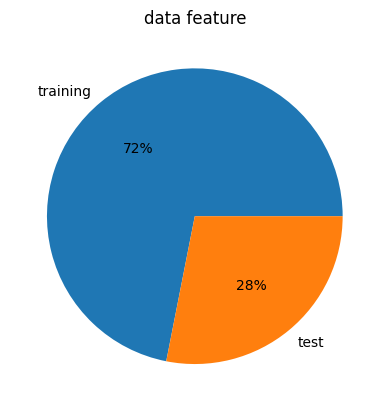

In [ ]:
plt.pie(x = data2["data"].value_counts().reset_index()["data"],
        labels = data2["data"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("data feature")
plt.show()

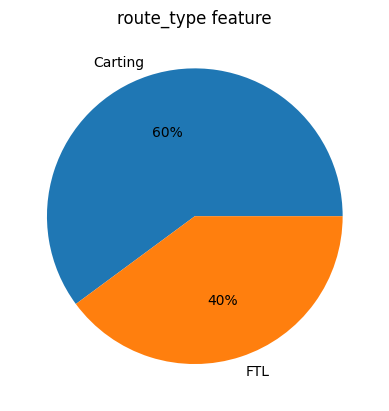

In [ ]:
plt.pie(x = data2["route_type"].value_counts().reset_index()["route_type"],
        labels = data2["route_type"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("route_type feature")
plt.show()

In [ ]:
plt.pie(x = data2["route_type"].value_counts().reset_index()["route_type"],
        labels = data2["route_type"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("route_type feature")
plt.show()

<Axes: xlabel='trip_creation_hour', ylabel='count'>

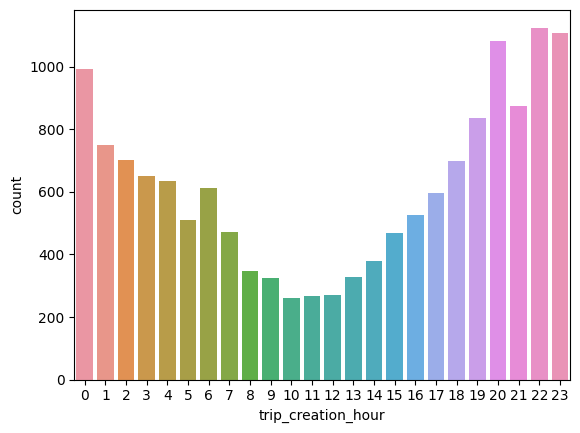

In [ ]:
sns.countplot(data=data2, x= "trip_creation_hour")

<Axes: xlabel='trip_creation_day', ylabel='count'>

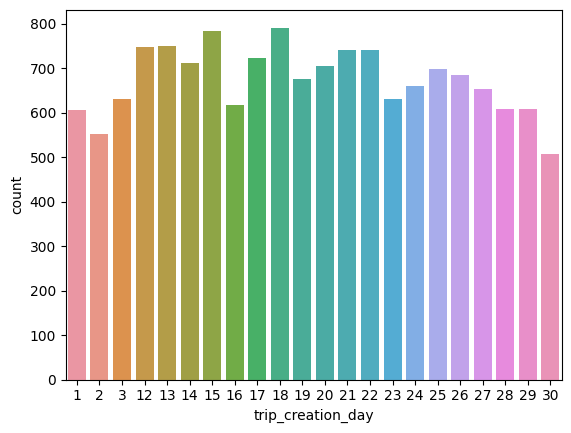

In [ ]:
sns.countplot(data=data2, x= "trip_creation_day")

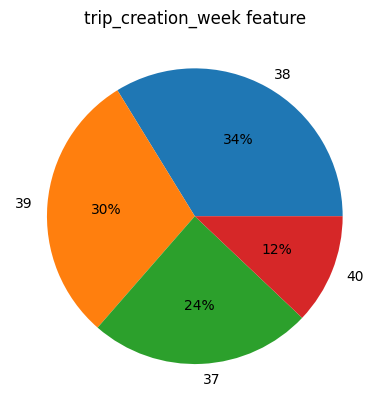

In [ ]:
plt.pie(x = data2["trip_creation_week"].value_counts().reset_index()["trip_creation_week"],
        labels = data2["trip_creation_week"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("trip_creation_week feature")
plt.show()

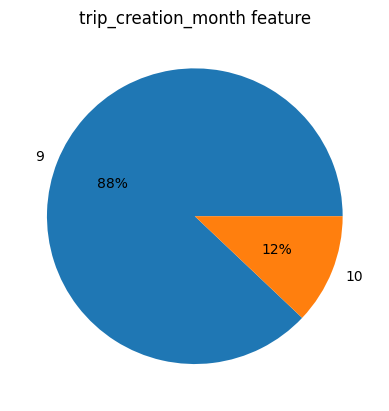

In [ ]:
plt.pie(x = data2["trip_creation_month"].value_counts().reset_index()["trip_creation_month"],
        labels = data2["trip_creation_month"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("trip_creation_month feature")
plt.show()

Text(0.5, 1.0, 'Source_State Feature')

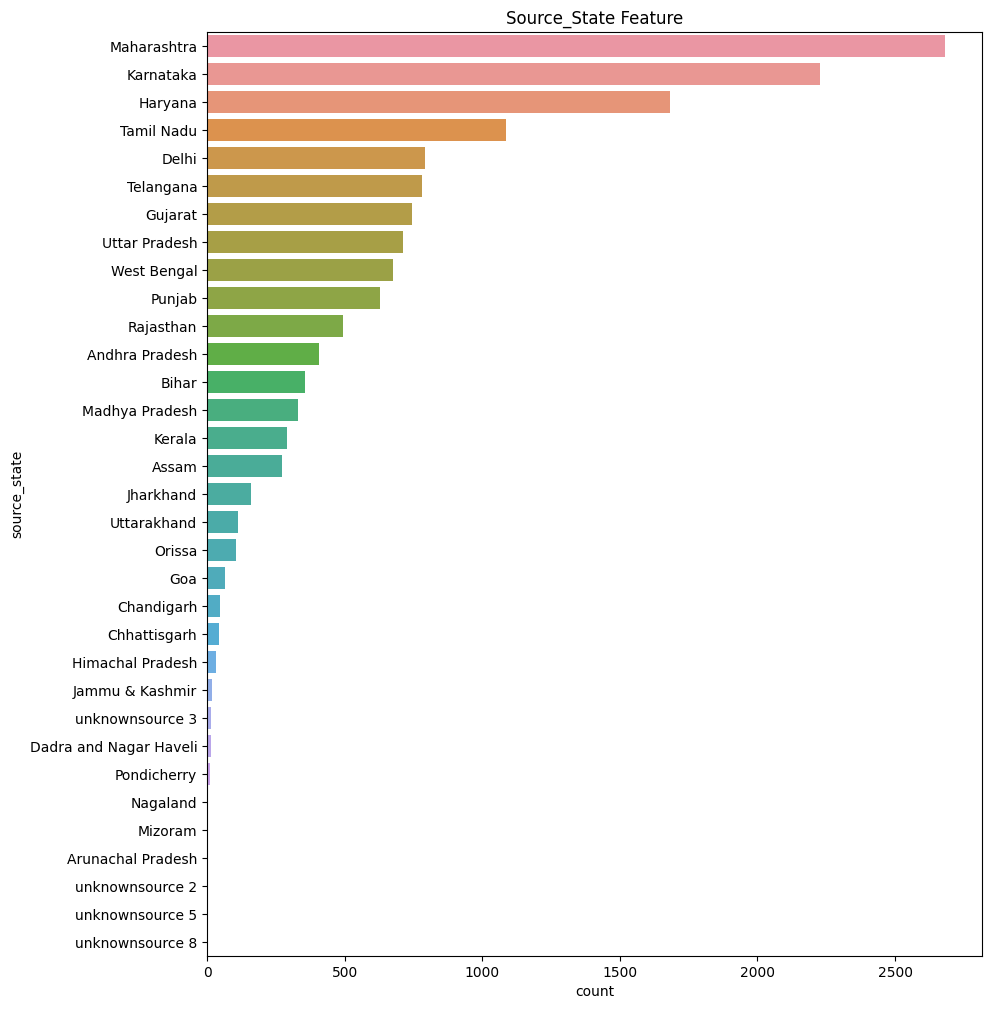

In [ ]:
plt.figure(figsize =(10,12))
sns.countplot(data=data2, y= "source_state",order=data2['source_state'].value_counts().index)
plt.title("Source_State Feature")

Text(0.5, 1.0, 'destination_state Feature')

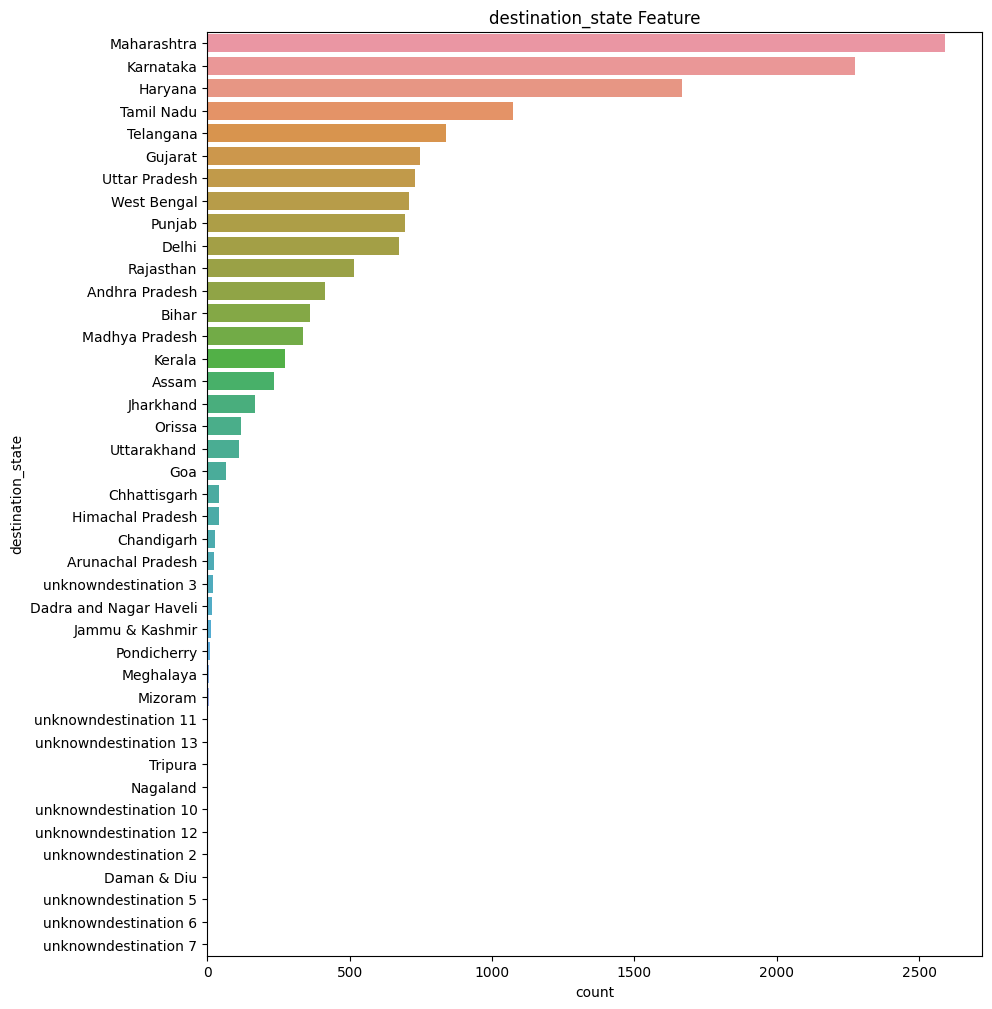

In [ ]:
plt.figure(figsize =(10,12))
sns.countplot(data=data2, y= "destination_state",order=data2['destination_state'].value_counts().index)
plt.title("destination_state Feature")

Text(0.5, 1.0, 'source_city Feature')

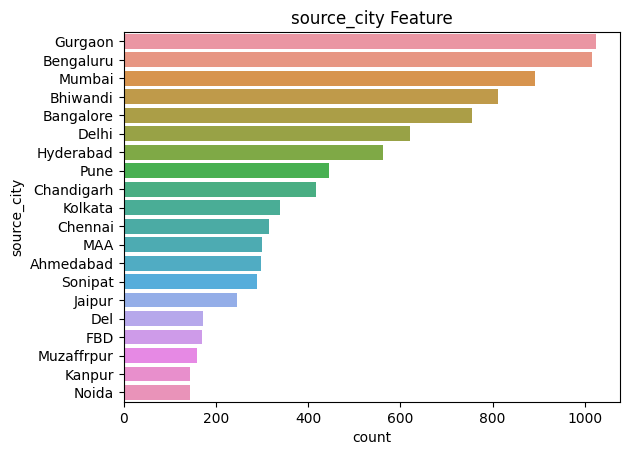

In [ ]:
sns.countplot(data=data2, y= "source_city",order=data2['source_city'].value_counts().index[:20])
plt.title("source_city Feature")

Text(0.5, 1.0, 'destination_city Feature')

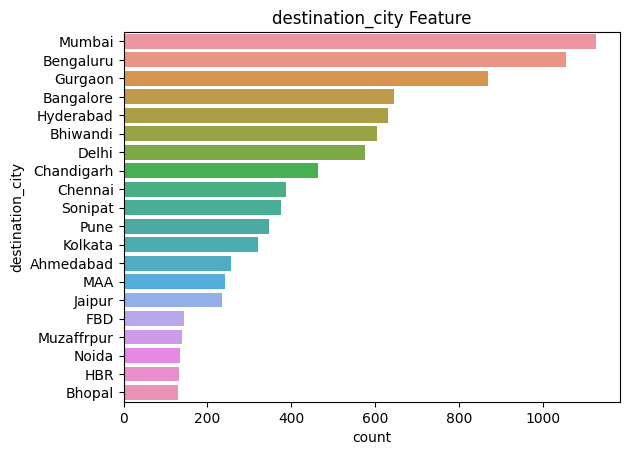

In [ ]:
sns.countplot(data=data2, y= "destination_city",order=data2['destination_city'].value_counts().index[:20])
plt.title("destination_city Feature")

Text(0.5, 1.0, 'source_place Feature')

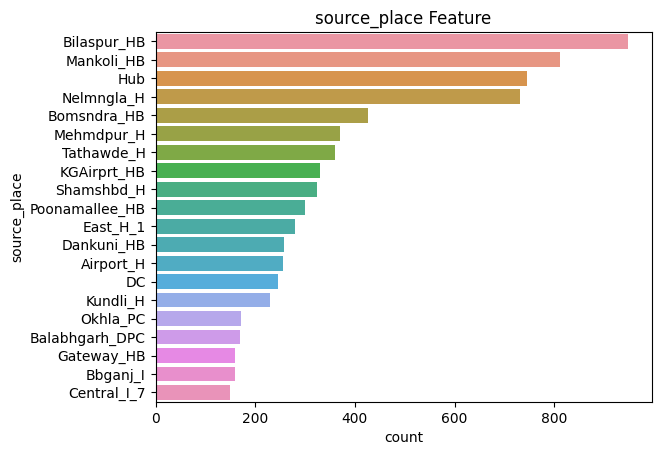

In [ ]:
sns.countplot(data=data2, y= "source_place",order=data2['source_place'].value_counts().index[:20])
plt.title("source_place Feature")

Text(0.5, 1.0, 'destination_place Feature')

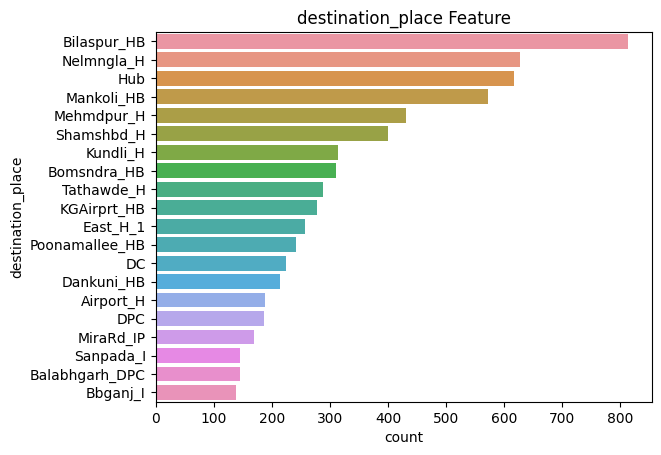

In [ ]:
sns.countplot(data=data2, y= "destination_place",order=data2['destination_place'].value_counts().index[:20])
plt.title("destination_place Feature")

Text(0.5, 0, 'time')

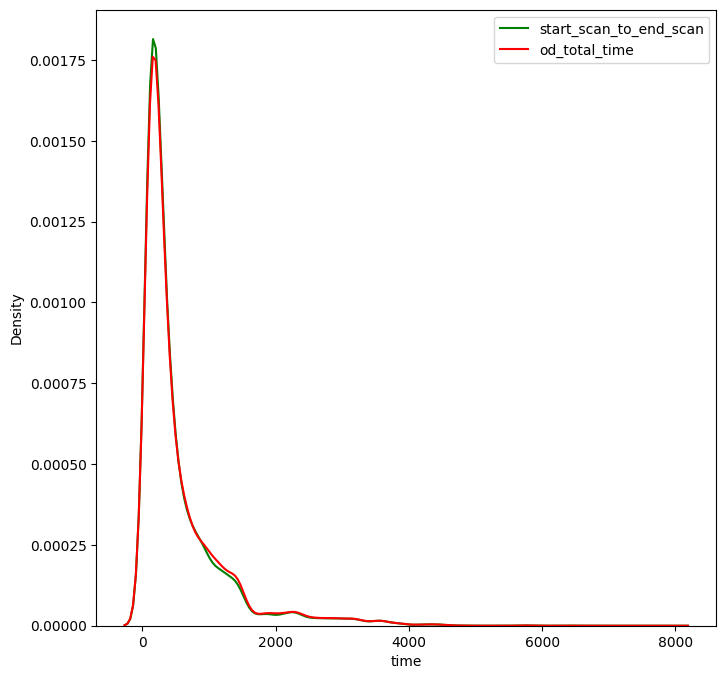

In [ ]:
plt.figure(figsize =(8,8))
sns.kdeplot(data=data2,x = "start_scan_to_end_scan", color = "green")
sns.kdeplot(data=data2,x= "od_total_time",color = "red")
plt.legend(["start_scan_to_end_scan","od_total_time"])
plt.xlabel("time")

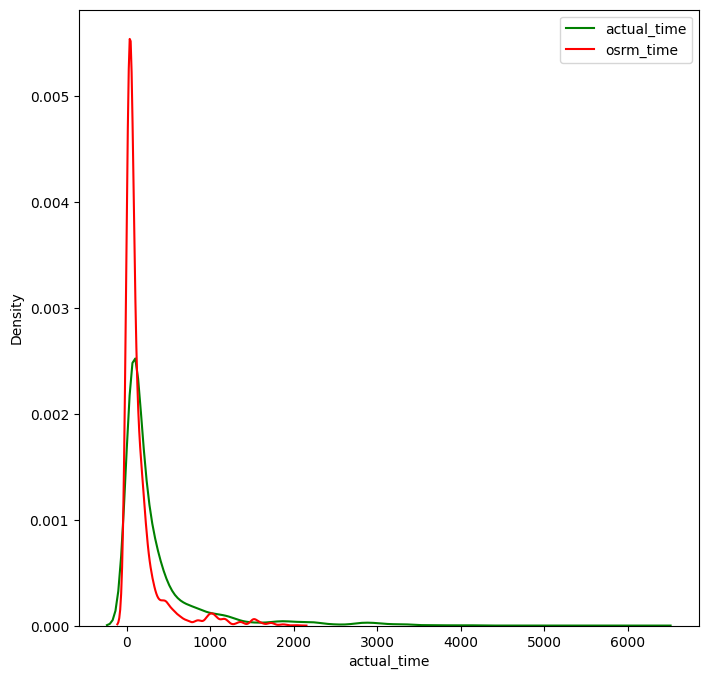

In [ ]:
plt.figure(figsize =(8,8))
sns.kdeplot(data=data2,x = "actual_time",color="green")
sns.kdeplot(data=data2,x= "osrm_time",color = "red")
plt.legend(["actual_time","osrm_time"])

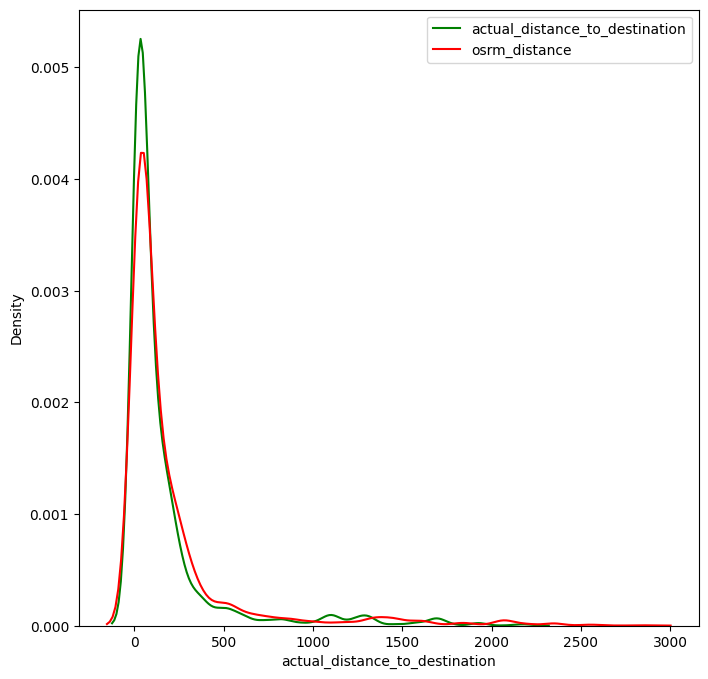

In [ ]:
plt.figure(figsize =(8,8))
sns.kdeplot(data=data2,x = "actual_distance_to_destination",color ="green")
sns.kdeplot(data=data2,x= "osrm_distance",color = "red")
plt.legend(["actual_distance_to_destination","osrm_distance"])

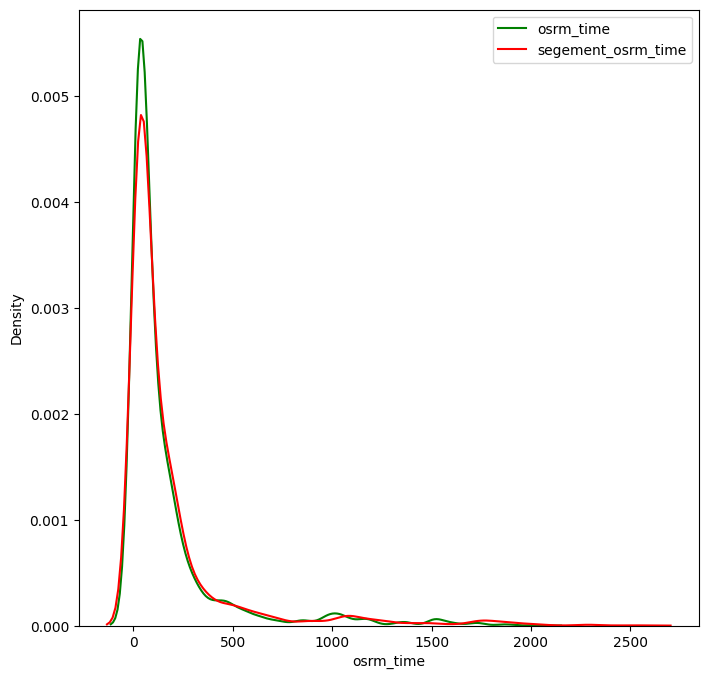

In [ ]:
plt.figure(figsize =(8,8))
sns.kdeplot(data=data2,x = "osrm_time",color = "green")
sns.kdeplot(data=data2,x= "segment_osrm_time",color = "red")
plt.legend(["osrm_time","segement_osrm_time"])

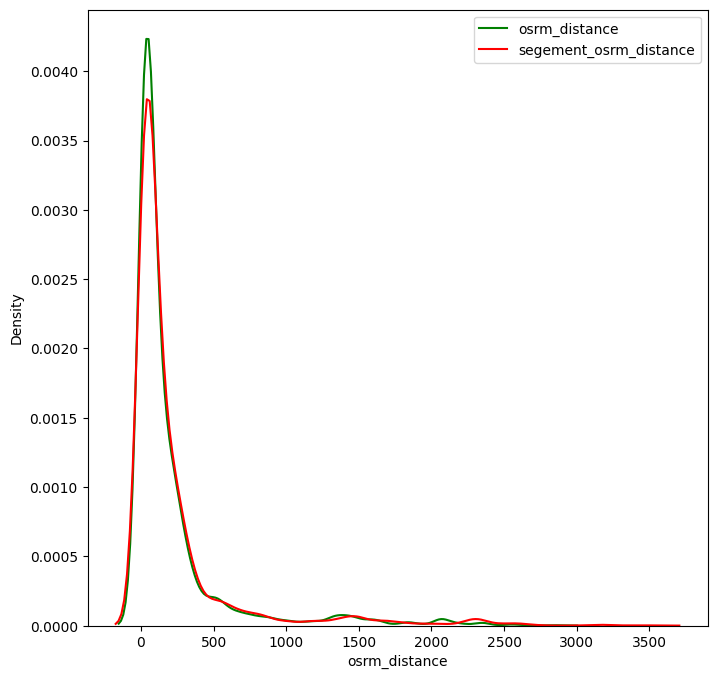

In [ ]:
plt.figure(figsize =(8,8))
sns.kdeplot(data=data2,x = "osrm_distance",color = "green")
sns.kdeplot(data=data2,x= "segment_osrm_distance",color = "red")
plt.legend(["osrm_distance","segement_osrm_distance"])

<ipython-input-167-9214ab8145cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr(),annot=True)


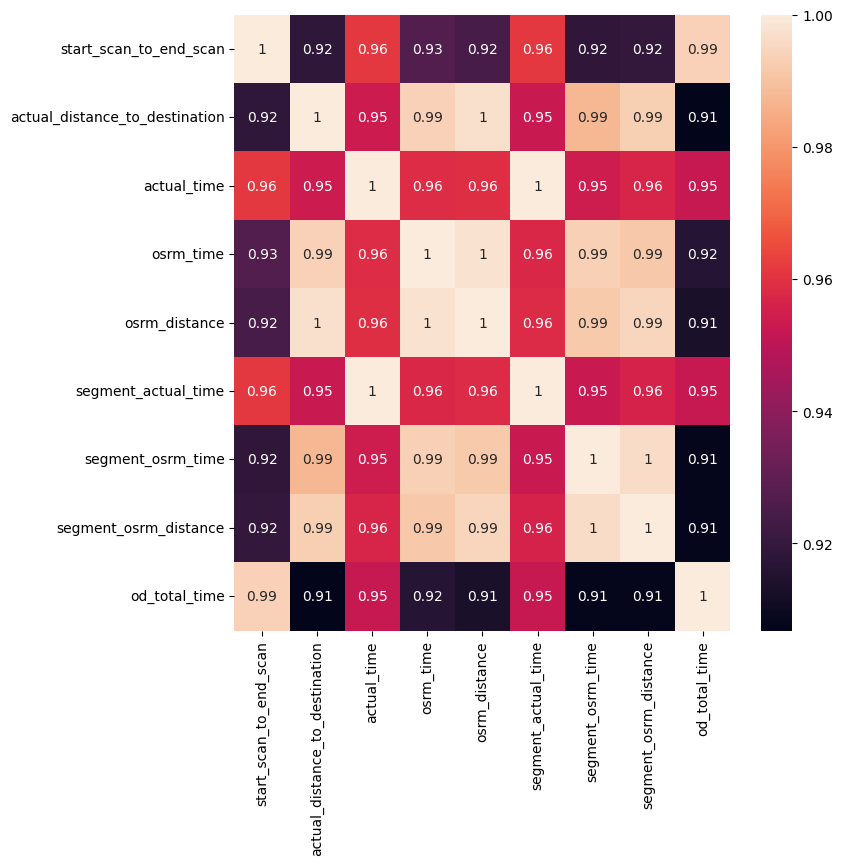

In [ ]:
plt.figure(figsize =(8,8))
sns.heatmap(data2.corr(),annot=True)
plt.show()

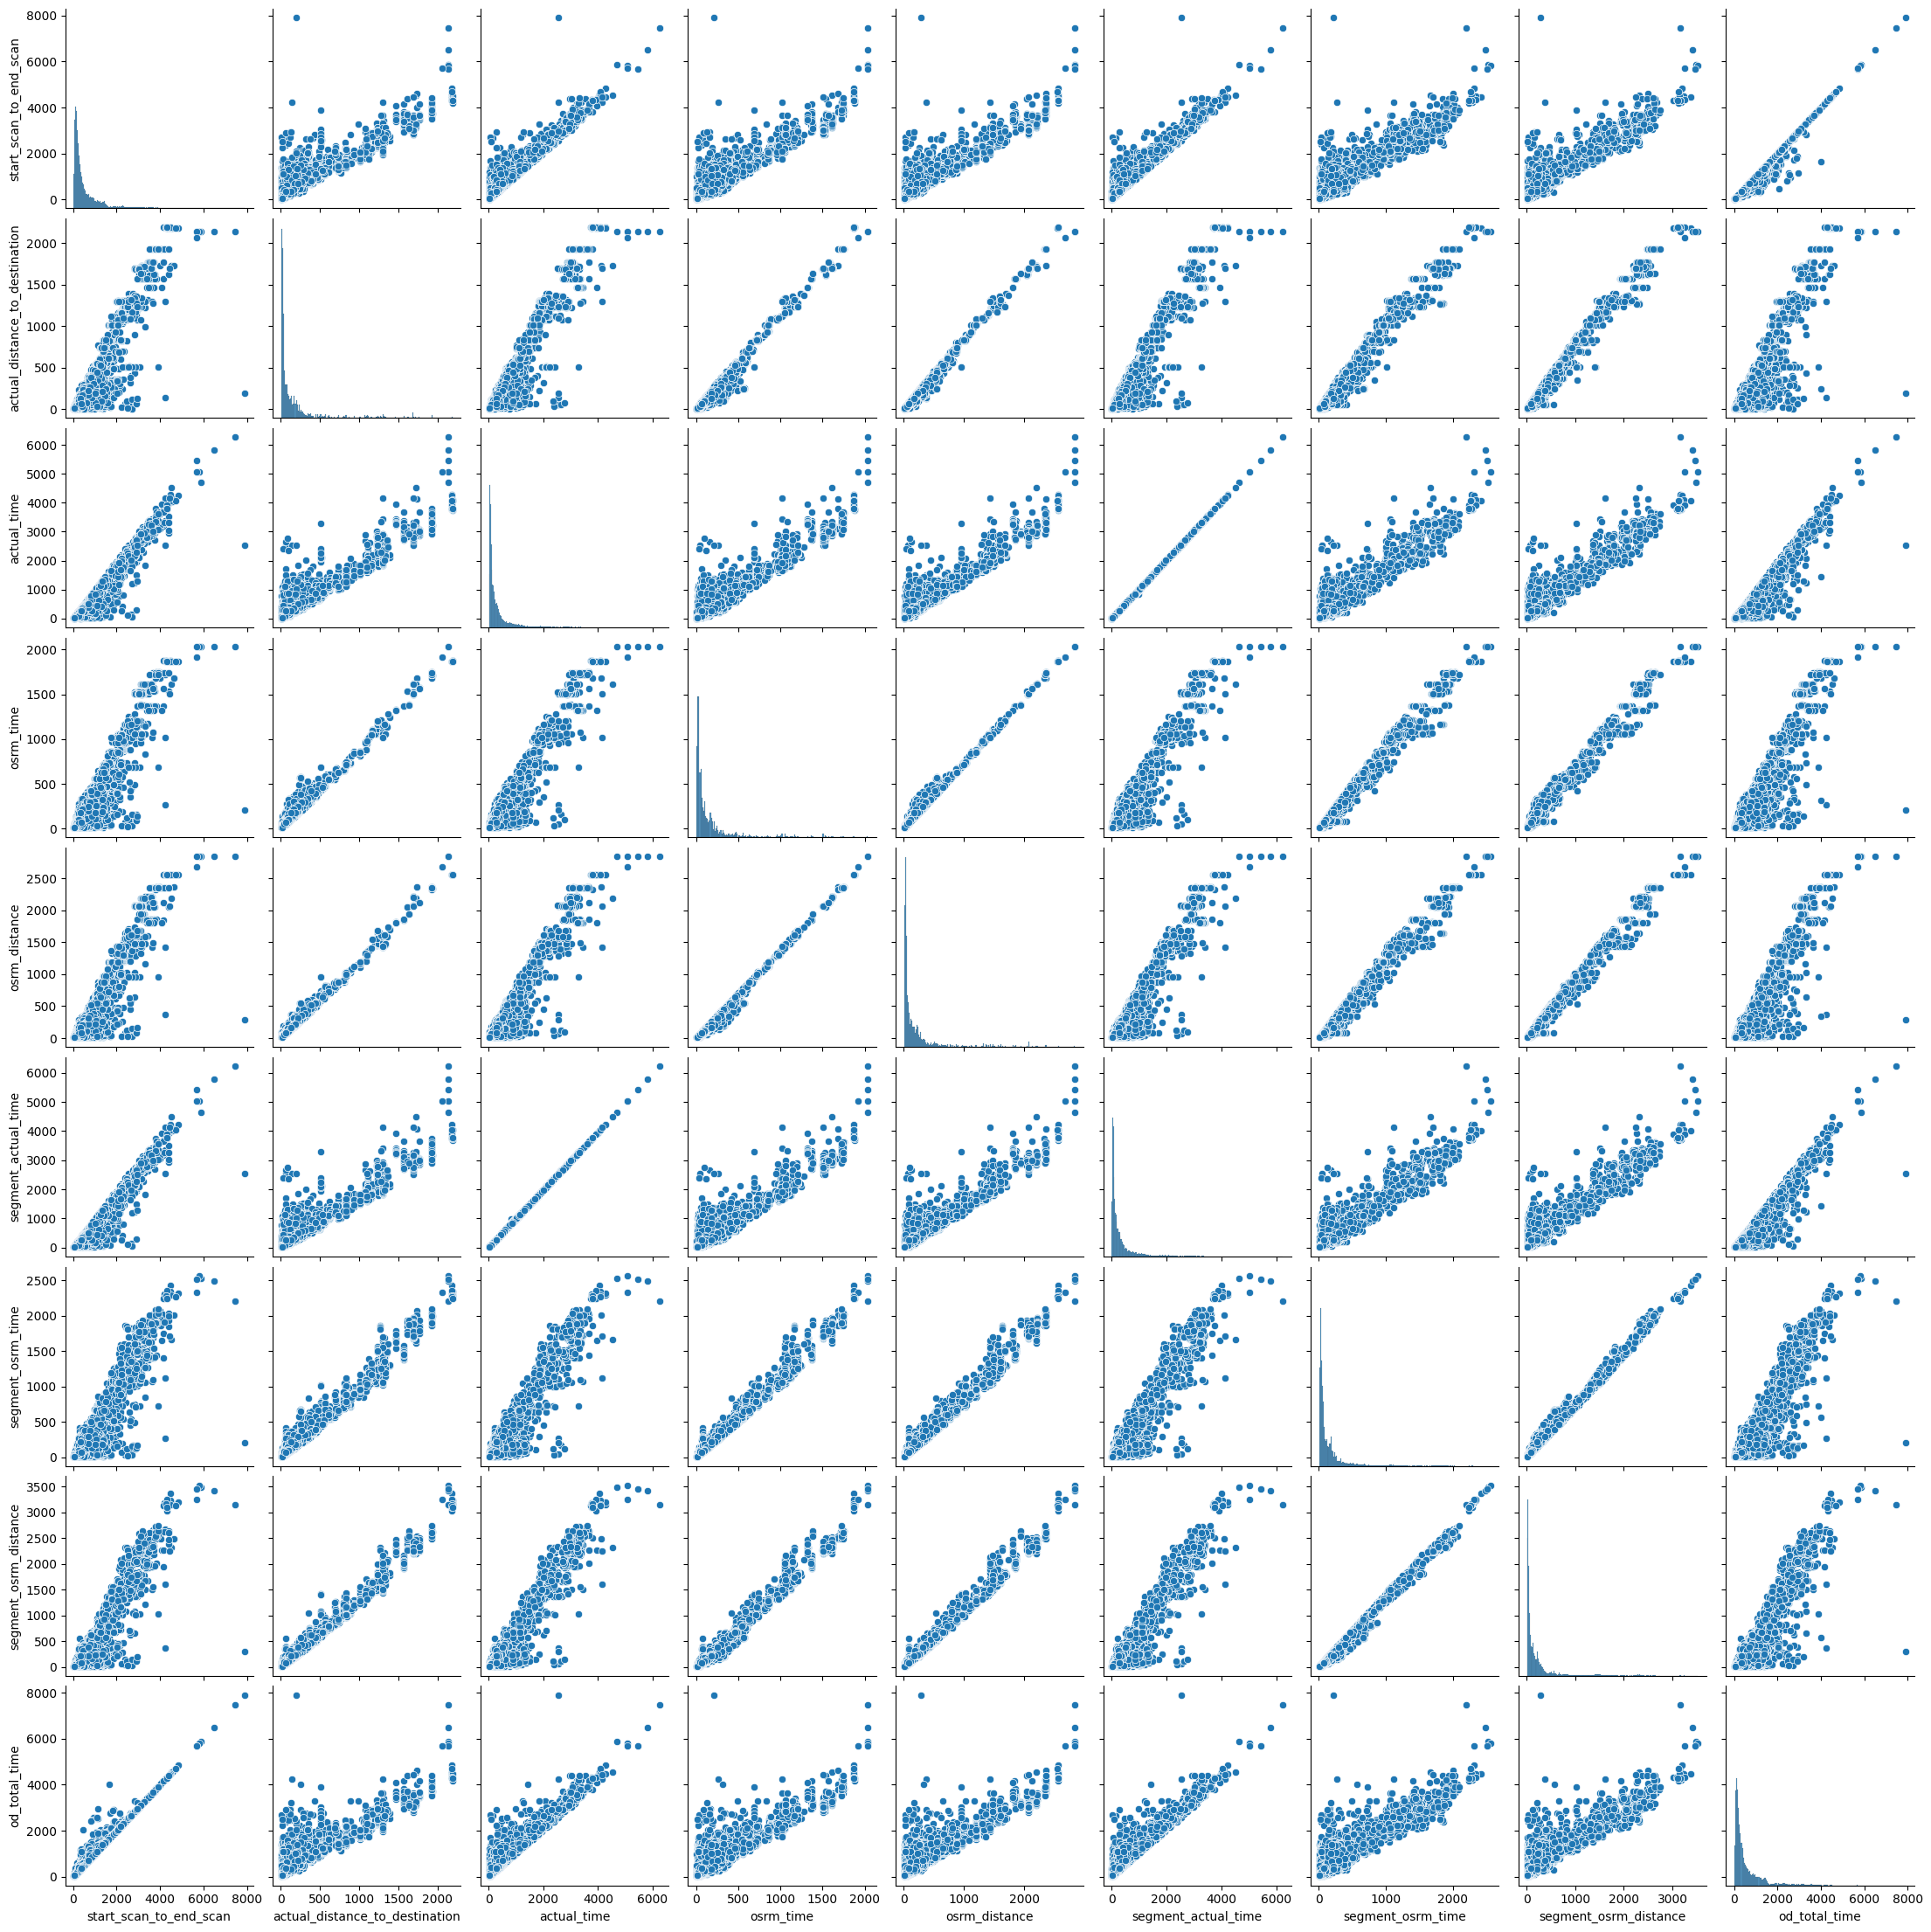

In [ ]:
sns.pairplot(data=data2)

# **Finding & Treating Outliers Using IQR**

In [32]:
numericalfeatures = ["start_scan_to_end_scan","od_total_time","actual_distance_to_destination","actual_time","segment_actual_time", "osrm_time",
 "osrm_distance","segment_osrm_time","segment_osrm_distance"]

## IQR Analysis

In [50]:
# Finding outlier for all Numerical features
outlier = pd.DataFrame() # creating as new dataframe to store outliers for each numerical feature
for z in numericalfeatures:
    print(z,"Feature")
    print("*******************************************************************")
    IQR = np.percentile(data2[z],75) - np.percentile(data2[z],25)
    lower_limit = max (np.percentile(data2[z],25) - 1.5*IQR,0)
    upper_limit = np.percentile(data2[z],75) + 1.5*IQR
    outlier[z] = (data2[z]>upper_limit) | (data2[z]<lower_limit)

    print("Minimum -->",data2[z].min())
    print("Lower Limit -->",lower_limit)
    print("Quantile25 -->",np.percentile(data2[z],25))
    print("Median -->",np.percentile(data2[z],50))
    print("Quantile75 -->",np.percentile(data2[z],75))
    print("Upper Limit -->",upper_limit)
    print("Maximum -->",data2[z].max())

    print()
    print("Out of ",len(data2[z]), "Data points , There are",outlier[z].sum(),"Outliers")
    print()
    print("*******************************************************************")

start_scan_to_end_scan Feature
*******************************************************************
Minimum --> 23.0
Lower Limit --> 0
Quantile25 --> 149.0
Median --> 280.0
Quantile75 --> 637.0
Upper Limit --> 1369.0
Maximum --> 7898.0

Out of  14817 Data points , There are 1267 Outliers

*******************************************************************
od_total_time Feature
*******************************************************************
Minimum --> 23.461468483333334
Lower Limit --> 0
Quantile25 --> 151.15848843333333
Median --> 288.5703387
Quantile75 --> 673.3013645
Upper Limit --> 1456.5156785999998
Maximum --> 7898.551954566667

Out of  14817 Data points , There are 1115 Outliers

*******************************************************************
actual_distance_to_destination Feature
*******************************************************************
Minimum --> 9.00246144174878
Lower Limit --> 0
Quantile25 --> 22.83723905859321
Median --> 48.47407210275264
Quantile75 --> 16

In [ ]:
# Finding outlier for all Numerical features
for z in numericalfeatures:
    outlierlist=[]
    print(z,"Feature")
    print("*******************************************************************")
    IQR = np.percentile(data2[z],75) - np.percentile(data2[z],25)
    lower_limit = max (np.percentile(data2[z],25) - 1.5*IQR,0)
    upper_limit = np.percentile(data2[z],75) + 1.5*IQR
    outlierlist.extend(list(np.where( (data2[z]>upper_limit) | (data2[z]<lower_limit) )[0]))

    print("Minimum -->",data2[z].min())
    print("Lower Limit -->",lower_limit)
    print("Quantile25 -->",np.percentile(data2[z],25))
    print("Median -->",np.percentile(data2[z],50))
    print("Quantile75 -->",np.percentile(data2[z],75))
    print("Upper Limit -->",upper_limit)
    print("Maximum -->",data2[z].max())

    print(outlierlist)

    print()
    print("Out of ",len(data2[z]), "Data points , There are",len(outlierlist),"Outliers")
    print()
    print("*******************************************************************")

## Box-Plot

* Let us visualize the outliers with Box plot

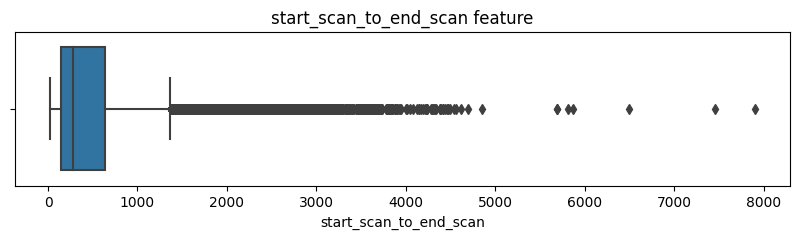

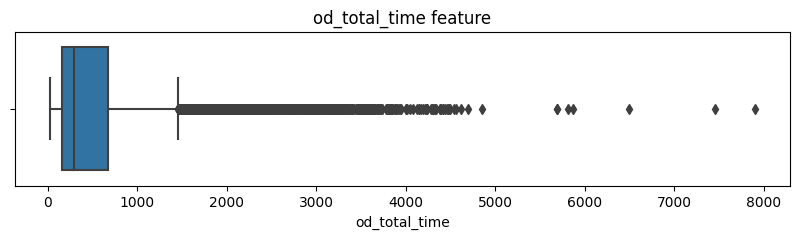

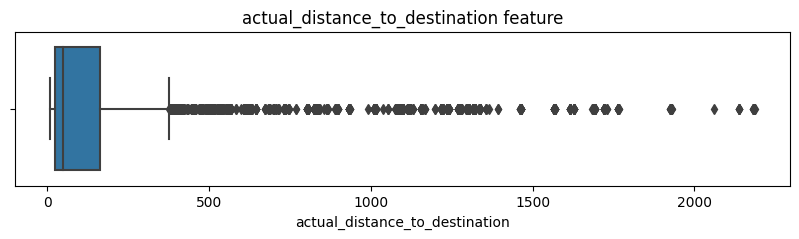

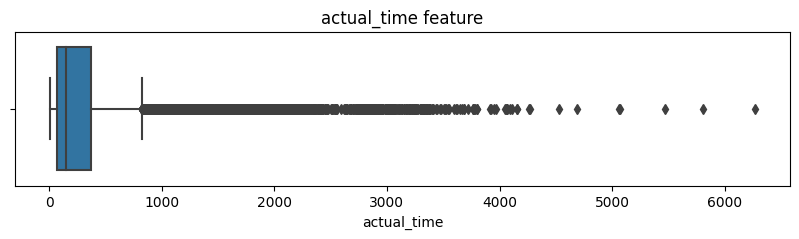

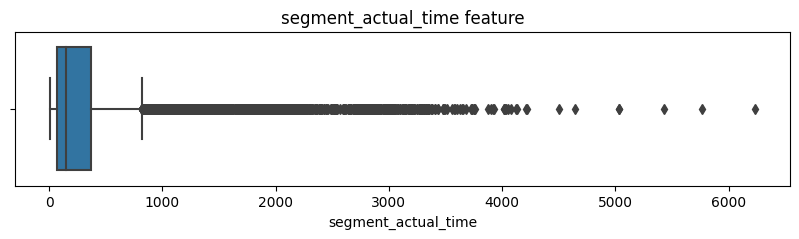

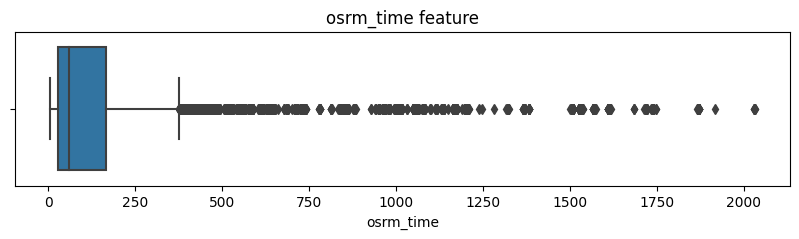

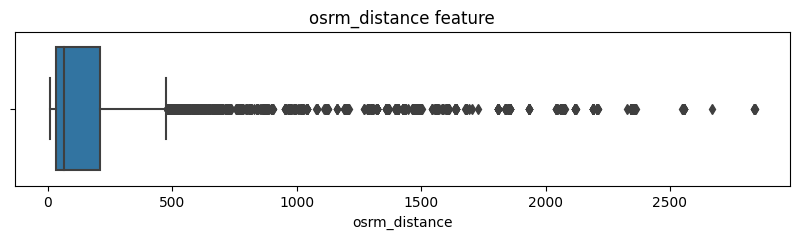

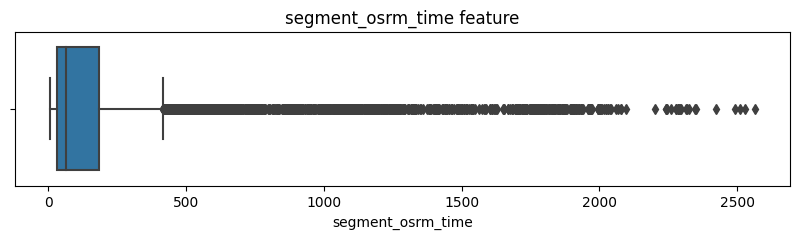

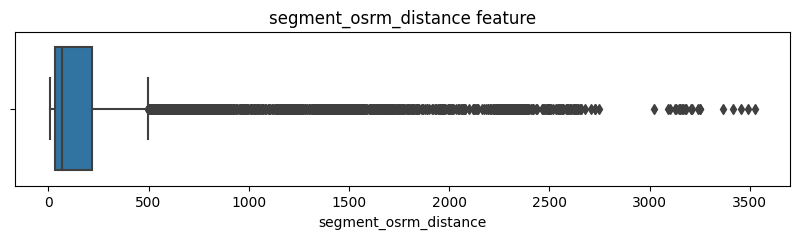

In [62]:
for z in numericalfeatures:
  plt.figure(figsize=(10,2))
  sns.boxplot(data= data2, x = z)
  plt.title(z+" feature")

## Outlier Treatment

* let us check if outliers are really outliers or they are occuring due to long distance/ Duration Couriers

In [53]:
outlier.shape

(14817, 10)

In [52]:
outlier["count"] = outlier.sum(axis=1)

In [63]:
# Checking for rows which have come as outliers in all 9 numerical columns
outlier[outlier["count"]==9].count()

start_scan_to_end_scan            943
od_total_time                     943
actual_distance_to_destination    943
actual_time                       943
segment_actual_time               943
osrm_time                         943
osrm_distance                     943
segment_osrm_time                 943
segment_osrm_distance             943
count                             943
dtype: int64

In [58]:
# Checking for rows which have come as outliers in all 9 numerical columns
data2.iloc[outlier[outlier["count"]==9].index]

,trip_uuid,data,route_schedule_uuid,route_type,trip_creation_time,source_name,source_center,destination_name,destination_center,start_scan_to_end_scan,...,trip_creation_day,trip_creation_week,trip_creation_month,trip_creation_year,source_state,source_city,source_place,destination_state,destination_city,destination_place
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2259.0,...,12,37,9,2018,Madhya Pradesh,Bhopal,Trnsport_H,Haryana,Gurgaon,Bilaspur_HB
2,trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),IND562132AAA,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,3933.0,...,12,37,9,2018,Karnataka,Bangalore,Nelmngla_H,Punjab,Chandigarh,Mehmdpur_H
41,trip-153671321710455800,training,thanos::sroute:951d77aa-4725-4c4e-882d-42acc35...,FTL,2018-09-12 00:46:57.104787,Bhiwandi_Mankoli_HB (Maharashtra),IND421302AAG,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2338.0,...,12,37,9,2018,Maharashtra,Bhiwandi,Mankoli_HB,Haryana,Gurgaon,Bilaspur_HB
43,trip-153671328307356992,training,thanos::sroute:64d4c6c9-ffb9-4794-b9f1-05f064c...,FTL,2018-09-12 00:48:03.073766,Delhi_Airport_H (Delhi),IND110037AAM,Bhiwandi_Mankoli_HB (Maharashtra),IND421302AAG,2302.0,...,12,37,9,2018,Delhi,Delhi,Airport_H,Maharashtra,Bhiwandi,Mankoli_HB
62,trip-153671547254076660,training,thanos::sroute:2a713f58-e06f-4251-a6f0-f374373...,FTL,2018-09-12 01:24:32.541032,Hyderabad_Shamshbd_H (Telangana),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND501359AAE,1792.0,...,12,37,9,2018,Telangana,Hyderabad,Shamshbd_H,Telangana,Hyderabad,Shamshbd_H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14701,trip-153860352246282031,test,thanos::sroute:be1c03eb-fd2f-4455-a933-5e3d085...,FTL,2018-10-03 21:52:02.463089,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Kolkata_Dankuni_HB (West Bengal),IND712311AAA,2114.0,...,3,40,10,2018,Haryana,Gurgaon,Bilaspur_HB,West Bengal,Kolkata,Dankuni_HB
14730,trip-153860570045461434,test,thanos::sroute:870bead8-6c8a-458f-b4d8-658de44...,FTL,2018-10-03 22:28:20.454881,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Ranchi_Hub (Jharkhand),IND834002AAB,2051.0,...,3,40,10,2018,Haryana,Gurgaon,Bilaspur_HB,Jharkhand,Ranchi,Hub
14750,trip-153860698042160875,test,thanos::sroute:67c77992-49e3-4594-9a75-9861ef0...,FTL,2018-10-03 22:49:40.421862,Bhiwandi_Mankoli_HB (Maharashtra),IND421302AAG,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,2660.0,...,3,40,10,2018,Maharashtra,Bhiwandi,Mankoli_HB,Punjab,Chandigarh,Mehmdpur_H
14769,trip-153860879439383883,test,thanos::sroute:105d3425-e2d7-4f05-ad0c-157dc94...,FTL,2018-10-03 23:19:54.394130,Bangalore_Nelmngla_H (Karnataka),IND562132AAA,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,4410.0,...,3,40,10,2018,Karnataka,Bangalore,Nelmngla_H,Punjab,Chandigarh,Mehmdpur_H


* There are total 943 Rows which have come as outlier in all 9 numerical features
* But we cannot delete the rows just because of the IQR rule, these outliers might be trips which are having very long distance & duration
* So all these outliers can be good Data points only
* so we cannot drop these outliers data point
* we will use them as OK


# **Hypothesis Testing**

* In this Data Differet test [Num-Num,Cat-Num,Cat-Cat] can be done
* But our objective to increase the end user experince by correctly predicting Duration of Delivery & for optimizing Logistics by correctly predicting distance w.r.t OSRM Distance & Duration
* Also we have to optimize Each Segment wise for each trip
* so we will do Hypothesis testing for below combinations
** od_total_time and start_scan_to_end_scan
** actual_time and osrm_time
** actual_time and segment_actual_time?
** osrm_time and segment_osrm_time
** actual_distance_to_destination and osrm_distance
** actual_distance_to_destination and segment_osrm_distance?
** osrm_distance and segment_osrm_distance




## Hypothesis Testing Set up

In this section let us fix the Confidence level & Level of Signification for all our Hypothesis testing.

As this is with respect to predicting demand Situation
* let us Assume **we want 95% Confidence to reject Null Hypothesi**s
* so for every Hypothesis testing, **Level of Significane will be "0.05 "**

As we have 2 Nos of Cat-Num, we will use 2 Sample T-Test or its equivalent
* Ho --> Both Categories have same Mean
* Ha --> Both Categories have different mean

Before using T-test , we will check: if both Data are following Normal Distribution? & does they have equal variance?

* For Normal Distribution, we will use Shapiro test with below Hypothesis Condition
** H0 : Data is Gaussian
** Ha : Data is not Gaussian

* For Equal Variances Check, we will use Levene Test with below Hypothesis condition
** H0: Variances are equal
** Ha: Variances are not equal




## od_total_time and start_scan_to_end_scan

## actual_time and osrm_time

# **Impact of Season on User Count**



## Season

1: spring, 2: summer, 3: fall, 4: winter

### Univariate Analysis

In [ ]:
data['season'].value_counts(normalize = True)

4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64

## Season & total_count

### Bivariate Analysis

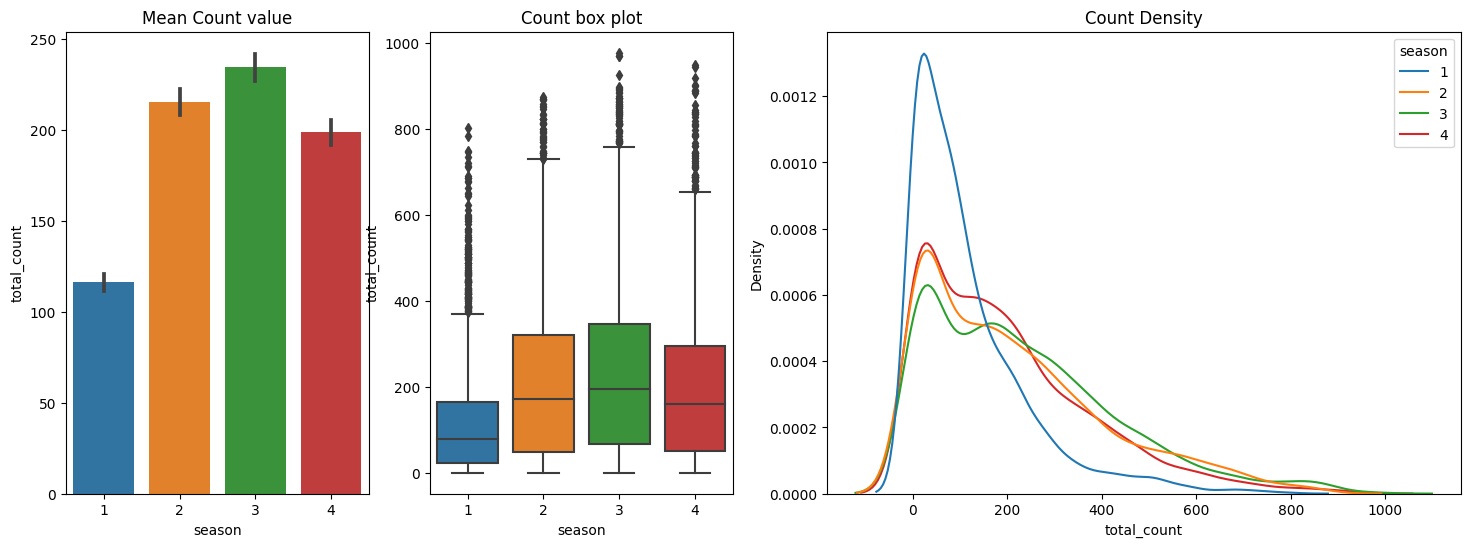

In [ ]:
bivariateplot(info = data,cat ="season",num="total_count")

In [ ]:
bivariateboxplotparameter(cat ="season",num="total_count")

,count,mean,std,min,25%,50%,75%,max,upper_Limit
season,,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0,374.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0,729.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0,765.5
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0,658.5


* No of user total_count in "1:Spring" season are very low with upper limit of 374
* whereas user total_count is highest in "3:fall" are high with upper limit count as 765


Let us do Hypthesis testing to check if Season has effect on Total_Count

### Hypothesis Testing

As we have 4 groups in seasons Category --> we will use ANNOVA & check how does seasons effect on user count

* Ho --> All seasons have same user count mean
* Ha --> Some seasons user count Mean are different

Before using ANNOVA, we will check if all 4 season category data is following Normal Distribution & does they have equal variance

* For Normal Distribution, we will use Shapiro test with below Hypothesis Condition
** H0 : Data is Gaussian
** Ha : Data is not Gaussian

* For Equal Variances Check, we will use Levene Test with below Hypothesis condition
** H0: Variances are equal
** Ha: Variances are not equal




In [ ]:
season1 = data[data["season"]==1]["total_count"]
season2 = data[data["season"]==2]["total_count"]
season3 = data[data["season"]==3]["total_count"]
season4 = data[data["season"]==4]["total_count"]

let's check for Normal Distribution of all four season data sets

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in [season1,season2,season3,season4]:
  test_stat, p_value = shapiro(i)
  if p_value < 0.05:
       print("Reject H0")
       print("Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print("Data is Gaussian")

Reject H0
Data is Not Gaussian
Reject H0
Data is Not Gaussian
Reject H0
Data is Not Gaussian
Reject H0
Data is Not Gaussian


* All 4 Season Data sets are not following Normal Distribution
* Once will check Histogram plot

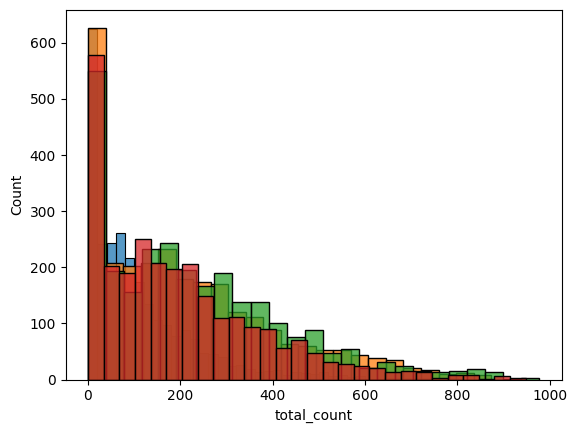

In [ ]:
for i in [season1,season2,season3,season4]:
  sns.histplot(i)

* Even the Histogram shows that they are not following Normal Distribution,kind of following power-law distribution
* Let's do QQ Plot also

<Figure size 300x200 with 0 Axes>

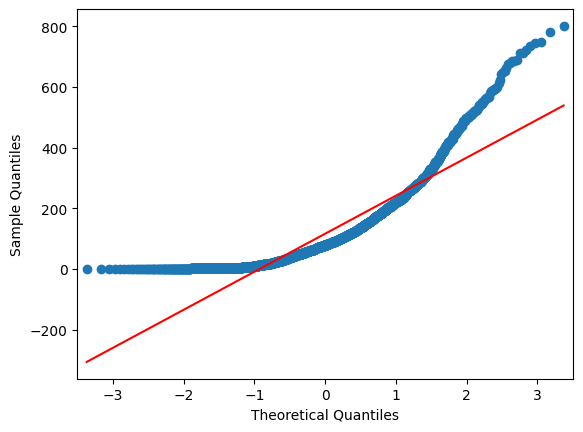

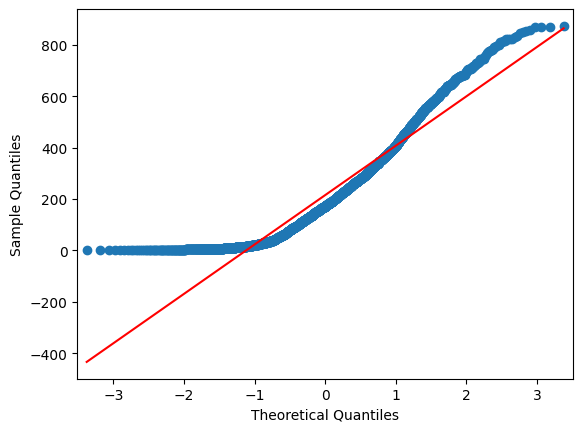

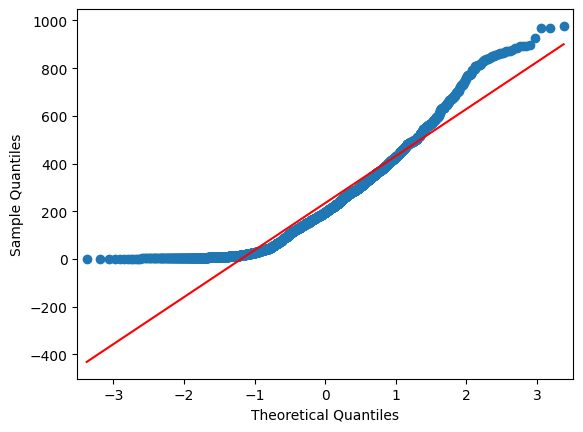

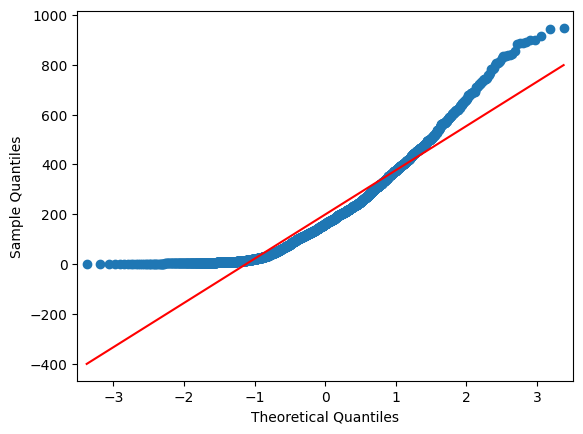

In [ ]:
plt.figure(figsize = (3,2))
for i in [season1,season2,season3,season4]:
   qqplot(i, line="s")

* From Shapiro, Histogram & QQ plot--> we can conclude that 4 season data sets are not following Normal Distribution
* Now we will do Levene test to check for equal Variances

In [ ]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

1.0147116860043298e-118
Reject Ho
Variances are not equal


* All four Seaons Datasets do not have equal Variance
* So 2 of 3 ANNOVA assumption fails, we will do kruskal Wallis test

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

2.479008372608633e-151
Reject H0
One or more groups have different mean


lets once check what might ANNOVA test give as result

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

f_stats, p_value = f_oneway(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

6.164843386499654e-149
Reject H0
One or more groups have different mean


Both ANNOVA & Kriskal Wallis test state the Seasons has Impact on the total_user count

With >95% confidence we can say that **Season has impact on total_user Count**

## Season & registered

### Bivariate Analysis

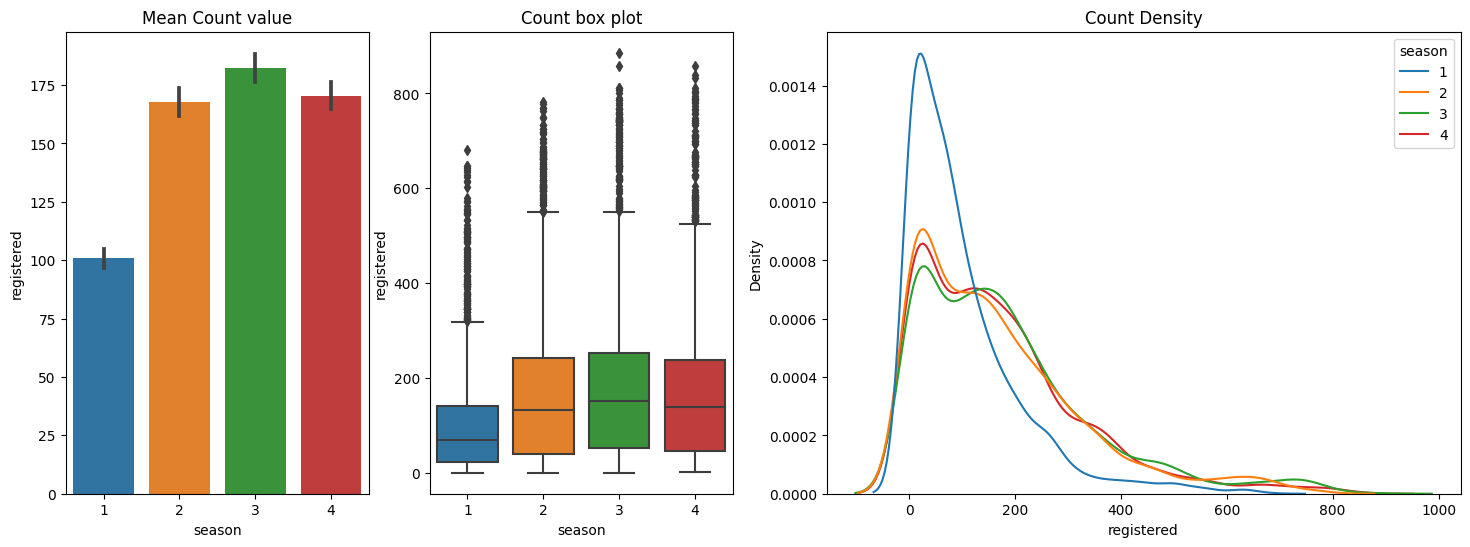

In [ ]:
bivariateplot(info = data,cat ="season",num="registered")

In [ ]:
bivariateboxplotparameter(cat ="season",num="registered")

,count,mean,std,min,25%,50%,75%,max,upper_Limit
season,,,,,,,,,
1,2686.0,100.853686,108.082025,0.0,22.0,69.0,141.00,681.0,319.500
2,2733.0,167.804610,156.156658,0.0,39.0,133.0,243.00,782.0,549.000
3,2733.0,182.196853,164.386982,0.0,53.0,151.0,252.00,886.0,550.500
4,2734.0,170.407462,154.828357,1.0,46.0,139.0,238.75,857.0,527.875


Let us do Hypthesis testing to check if Season has effect on Registered

### Hypthesis Testing

* As Bivariate "Count Density" plots are almost Similar to Total_count,they also do not follow Normal Distribution
* So we will straight away do Kruskalwallis test

In [ ]:
season1 = data[data["season"]==1]["registered"]
season2 = data[data["season"]==2]["registered"]
season3 = data[data["season"]==3]["registered"]
season4 = data[data["season"]==4]["registered"]

#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

2.3698212326776174e-117
Reject H0
One or more groups have different mean


with >95% confidence we can say that **season has impact on registered user Count also**

## Season & casual

### Bivariate Analysis

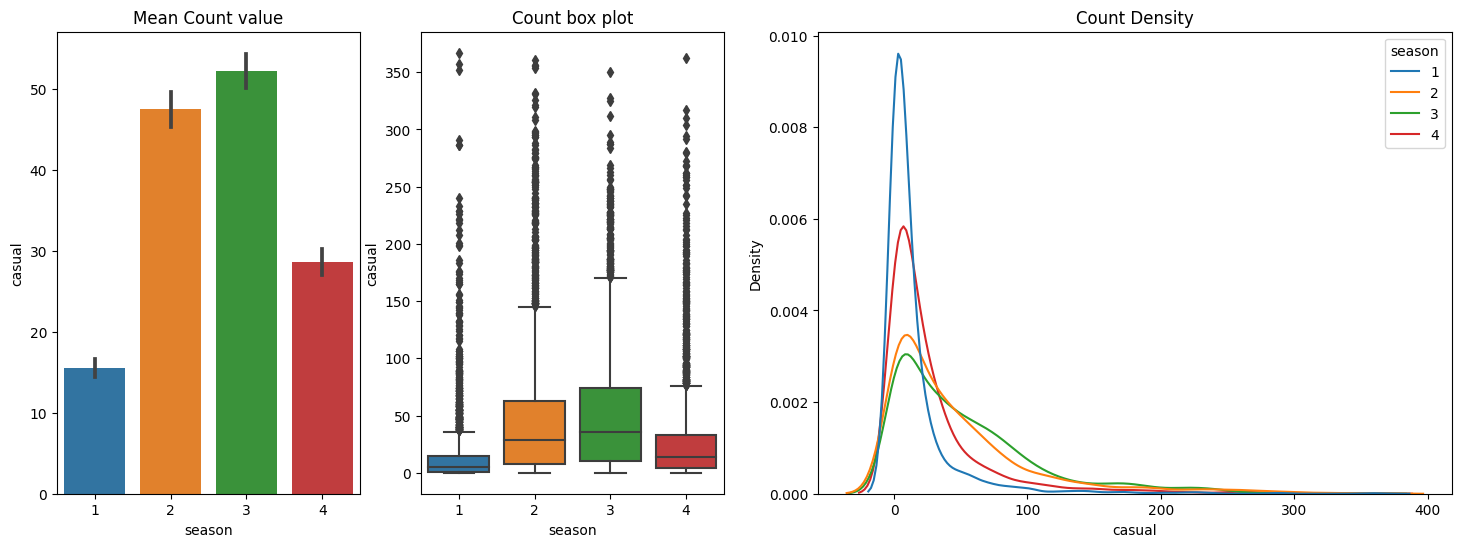

In [ ]:
bivariateplot(info = data,cat ="season",num="casual")

In [ ]:
bivariateboxplotparameter(cat ="season",num="casual")

,count,mean,std,min,25%,50%,75%,max,upper_Limit
season,,,,,,,,,
1,2686.0,15.489576,31.222498,0.0,1.0,5.0,15.0,367.0,36.0
2,2733.0,47.446762,57.649556,0.0,8.0,29.0,63.0,361.0,145.5
3,2733.0,52.220271,54.638059,0.0,10.0,36.0,74.0,350.0,170.0
4,2734.0,28.580834,42.596214,0.0,4.0,14.0,33.0,362.0,76.5


Let us do Hypthesis testing to check if Season has effect on Casual

### Hypothesis Testing

* As seen Bivariate "Count Density" plots are almost Similar to Total_count, they also do not follow Normal Distribution
* So we will straight away do Kruskalwallis test

In [ ]:
season1 = data[data["season"]==1]["casual"]
season2 = data[data["season"]==2]["casual"]
season3 = data[data["season"]==3]["casual"]
season4 = data[data["season"]==4]["casual"]

#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

0.0
Reject H0
One or more groups have different mean


with >95% confidence we can say that **Season has impact on Casual user Count also**

# **Feature Engineering**

* In this Section we will try solution through different approach i.e., feature Engineering
* I will use "Label Endoder" & "Target encoder with Total_count as Target" to convert all the Categorical data to Numerical
* Then i will use Correlation values to find the most Signification Feature to predict User_count on a given day

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  category      
 2   holiday       10886 non-null  category      
 3   workingday    10886 non-null  category      
 4   weather       10886 non-null  category      
 5   temp          10886 non-null  float64       
 6   feeling_temp  10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  total_count   10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 808.6 KB


* Creating as TargetEncoder Object

In [ ]:
te=TargetEncoder()

## Season : Category --> Numerical

In [ ]:
data["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
data["season"]=te.fit_transform(data["season"],data["total_count"])
data["season"].value_counts()

198.988296    2734
215.251372    2733
234.417124    2733
116.343261    2686
Name: season, dtype: int64

## Weather : Category --> Numerical

In [ ]:
data["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
data["weather"]=te.fit_transform(data["weather"],data["total_count"])
data["weather"].value_counts()

205.236791    7192
178.955540    2834
118.846333     859
187.986504       1
Name: weather, dtype: int64

* Both Weather & Season have been changed from Categorical to Numerical by targetEncoding woth target as Total_count

* Both Holiday & Workingday are already label Encoded

In [ ]:
le=LabelEncoder()

In [ ]:
data["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
data["holiday"]=le.fit_transform(data["holiday"])
data["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
data["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
data["workingday"]=le.fit_transform(data["workingday"])
data["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
data["workingday"]=te.fit_transform(data["workingday"],data["total_count"])
data["workingday"].value_counts()

193.011873    7412
188.506621    3474
Name: workingday, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  float64       
 2   holiday       10886 non-null  int64         
 3   workingday    10886 non-null  int64         
 4   weather       10886 non-null  float64       
 5   temp          10886 non-null  float64       
 6   feeling_temp  10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  total_count   10886 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 1020.7 KB


* All feature have been converted to Numerical except for datetime
* lets drop that datetime feature

In [ ]:
data.drop("datetime",axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        10886 non-null  float64
 1   holiday       10886 non-null  int64  
 2   workingday    10886 non-null  int64  
 3   weather       10886 non-null  float64
 4   temp          10886 non-null  float64
 5   feeling_temp  10886 non-null  float64
 6   humidity      10886 non-null  int64  
 7   windspeed     10886 non-null  float64
 8   casual        10886 non-null  int64  
 9   registered    10886 non-null  int64  
 10  total_count   10886 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 935.6 KB


* Now Lets find he Correlation Value and find the most signification feature to predict total_count

In [ ]:
data.corr()

,season,holiday,workingday,weather,temp,feeling_temp,humidity,windspeed,casual,registered,total_count
season,1.000000,0.007620,0.000136,0.014393,0.697446,0.692124,0.150192,-0.126915,0.271964,0.207020,0.247623
holiday,0.007620,1.000000,-0.250491,0.012219,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,0.000136,-0.250491,1.000000,-0.037005,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.014393,0.012219,-0.037005,1.000000,0.047353,0.049666,-0.392010,-0.022443,0.134838,0.115154,0.133205
temp,0.697446,0.000295,0.029966,0.047353,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
feeling_temp,0.692124,-0.005215,0.024660,0.049666,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.150192,0.001929,-0.010880,-0.392010,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.126915,0.008409,0.013373,-0.022443,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.271964,0.043799,-0.319111,0.134838,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.207020,-0.020956,0.119460,0.115154,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<Axes: >

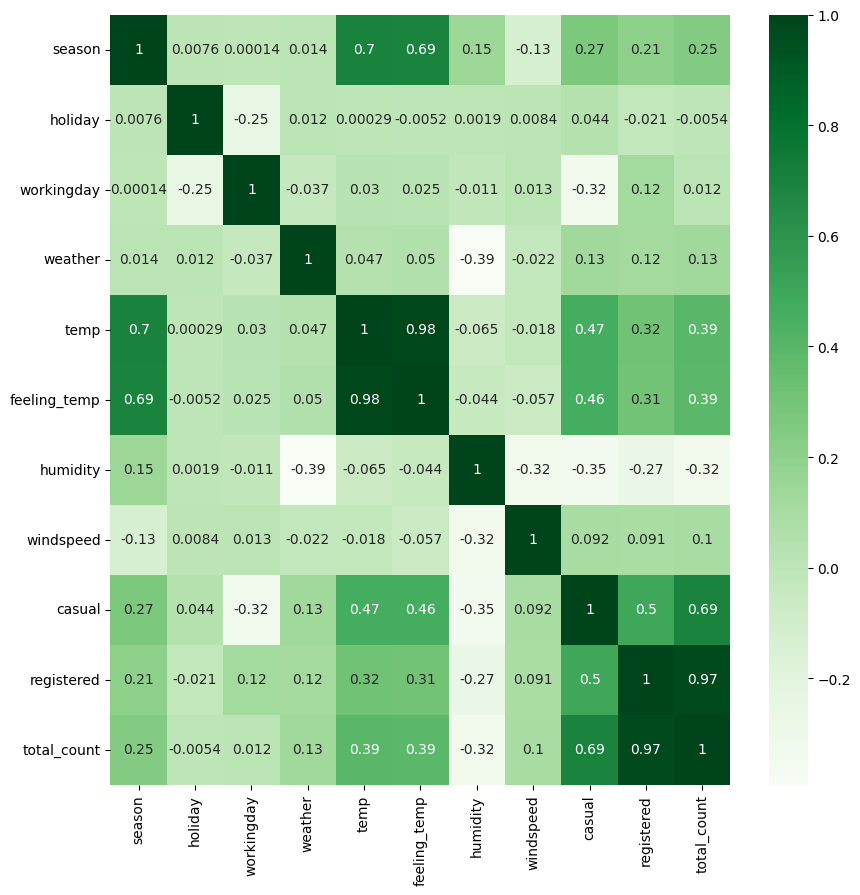

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap = "Greens")


Simialr to what we have conclude in Hypothesis Testing for Total_count, Correlation matrix values are also Giving same output
* Holiday & working daya has no impact on Total_count
* Season & Weather have impact on Total_count
* temp & feeling_temp are positively correlated on Total_count
* Humidity is negatively correlated on Total_count
* Windspeed has very less Positive Correlation on Total_count

As we Target encoded feature w.r.t Total_count, the above correlation matrix is giving correct correlation values for total_count only

# **Bussiness Insights**

## Overall Summary:
* total_count of user per day range between 0 to 647, however there are some unsual booking some days ranging from 648 to 977 per day
* registered user per day range between 0 to 501, however there are some unsual booking some days ranging from 502 to 886 per day
* casual user per day range between 0 to 116, however there are some unsual booking some days ranging from 117 to 367 per day


## Datetime

* User count is maximum in the month of 5~10
* with Hypothesis testing we concluded that Months from Datetime and Season are dependent on each other

## Seasons
* No of user total_count in "1:Spring" season are very low with upper limit of 374 & Average Total_count of 116
* whereas user total_count is highest in "3:fall" are high with upper limit count as 765 & Average Total_count of 234
* **With >95% Confidence we can say that Total_count, Registered & Casual User count are impacted by Seasons**

## Weather
* No of user total_count reduced as the weather became severe
* No of user total_count in Weather:1 is high with upper limit of 690 & Average  of 205
* No of user total_count in Weather:3 is low with upper limit of 368 & Average of 118
* There was only one booking for weather:4 with 164 users[registered : 158 & casual:6]
* **With >95% Confidence we can say that Total_count, Registered & Casual User count are impacted by Weather**

## Weather & Season
* User count High user count in Weather1[Clear, Few clouds] & Season3[Fall] & Least user count in Weather4[Thuderstorm ,Snow] & Season1[Spring]
* **with >95% Confidence we can conclude that Weather & Seasons are Dependent**

## Holiday
* Mean of Total_Count reduced on a holiday compared to Non-Holiday, However in Contradiction **Hypothesis testing proved with 95% confidence that Holiday day/Non Holiday day has no impact on Total_user count mean**
* Mean of Registered user reduced on a holiday compared to Non-Holiday & to Affirm **Hypothesis testing proved with 95% confidence that Holiday day/Non Holiday day has impact on  Registered count**
* No of user Casual increase on a holiday compared to Non-Holiday & to affirm **Hypothesis testing proved with 95% confidence that  Casual user count is higher on Holiday compared to Non Holiday**

## Workingday

* Total_count Mean of Working day & Non Workingday has not much diffeence and to affirm that **Hypothesis testing proved with 95% confidence that Workingday/Non Workingday has no impact on Total_user count mean**
* Registered user counts is higher on a working day compared to Non working day and to affirm **Hypothesis testing proved with >95% confidence that registered user count is higher on Working day compared to Nonworking day**
* Casual user count is higher on a non working day compared to working day and to affirm **Hypothesis testing proved with >95% confidence that Casual user count is higher on Nonworking day compared to Working day**

## Temp & Feeling_Temp
* Hypotheis testing proved with >95% that there is Strong Correlation between Temp & Feeling_temp [Pearson Coefficienct : 0.98]
* Total users Avg count increased as the temperature increased till 36 deg Celsius & then count dropped
* To affirm **Hypothesis testing proved with >95% Confidence that Temp has good positive correlation with Total_users, Regisetered & Casual User Count**


## Humidity
* Avg Users count peaked in the humidity range of 20-22 & then grdually dropped
* To affirm **Hypothesis testing proved with >95% Confidence that Humidity has good negative correlation with Total_users, Registered & Casual User Count**

## Windspeed
* Mostly wind are in the range 8 ~ 24 & Avg Users count peaked in the Windspeed range of 20-35
* To affirm **Hypothesis testing proved with >95% Confidence that Windspeed has very less positive correlation with Total_users, Registered & Casual User Count**


# **Recommendations**

* Maximum usage is found in the Fall Season, its Better to avoid Possible Maintenence activity during that season & Keep More Electric bikes ready to use
* Simialrily as Usage is less in Spring season, All Possible Maintenence to be done in  fall season

* In weather3,4, user count is very less due to harsh weather conditions, Yulu can modify the design to instantly install sepal shield(motorcycle shield that protects riders from harsh weather conditions) to make it viable to use in harsh weather conditions also, so its can retain customer base even in harsh weather conditions

* Casual User increase on Holiday & Non working day, Yulu can better prepare its logistics to cater those unplanned Casual users & convert them to regular customers with some additional feel good service

* Temperature play quite some role for user to use Yulu, when temperature is in the range 0 ~ 20, yulu can provide additional comfort mechanism[low cost handle heaters] to increase user count
